

# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>



>## Introduction



The Movie Database (TMDb) contains comprehensive information on thousands of movies released over the past few decades. This database not only contains details about the movie's production (eg director, production company, budget, etc.), but also data on how viewers vote for the movie on the site.

In this project, I will analyze the dataset provided by TMDb and investigate its data points to evaluate properties associated with hugely popular films. First, I will clean the data, then I will provide different visualizations through Matplotlib to identify patterns and also for comparisons in the data.

In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




<a id='eda'></a>


>## Data Wrangling
In this step, I will load in the data,
## General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('C:/Users/Abdulrhman/Downloads/tmdb-movies.csv')
df.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Well, obviously hhere are [10866  columns and  21 columns.]

<a id='eda'></a>


>## Data Cleaning


#### How many duplicate we have  ?

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.duplicated().sum()


1

## As we see in this table we have only one duplicate ! 

##### so must remove it :) 

In [5]:
#remove the duplicated row
df.drop_duplicates(inplace = True)
#check to see if row removed
df.shape

(10865, 21)

In [6]:
df.duplicated().sum()

0

###### WE ARE CLEAN NOW   -_^

###  

### GREAT !
NOW let's look for to  any unnecessary columns

In [7]:
#remove unnecessary columns
df.drop(['release_date','imdb_id', 'homepage','tagline', 'keywords', 'overview', 'budget_adj','revenue_adj'], axis=1, inplace=True)


### Hmmmmmm
#### It's  Clear Now ?

 



Okay lelt's descrab what we did       WHAT and WHY 



imdb_id: This value is not necessary in analyzing information within the table.4

homepage, tagline, overview, keywords: These values are unique to each row and cannot be used to make comparisons across multiple rows.

budget_adj, revenue_adj: Since the 'budget_adj' and 'revenue_adj' columns adjust the budget and revenue values in terms of 2010 dollars and will therefore allow for more accurate comparisons and analysis, these columns are not needed.

release_date: I will be using release year to analyze this data, so this more specific column is not needed.

In [8]:
df.head()


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [9]:
#remove rows with null values
df.dropna(inplace = True)
df.isnull().sum()
df.shape

(9772, 13)

In [10]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015


There is one more thing we should know about the number of unplayed movies in showtime 

Because we won't need them
So let's check it and remove it if we have zeros

In [11]:
# making a mask of zero values
is_runtime_zero = df['runtime'] == 0
df[is_runtime_zero].shape , df[is_runtime_zero].index.values

((13, 13),
 array([  92,  334,  445,  486, 1289, 1293, 3329, 3857, 4944, 5695, 5920,
        5938, 6934], dtype=int64))

In [12]:
df[is_runtime_zero]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,11,5.4,2015
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",80,6.5,2015
445,353345,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,52,5.0,2015
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,11,5.4,2015
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,16,3.4,2014
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,14,6.0,2014
3329,20414,0.082898,0,0,"Grande, grosso e Verdone",Carlo Verdone|Claudia Gerini|Eva Riccobono|Vit...,Carlo Verdone,0,Family,Filmauro,35,5.3,2008
3857,289097,0.095583,0,0,Cell 213,Bruce Greenwood|Eric Balfour|Michael Rooker|De...,Stephen Kay,0,Horror,Access Motion Pictures,13,5.2,2011
4944,158150,0.026459,0,0,How to Fall in Love,Brooke D'Orsay|Eric Mabius|Jody Thompson|Gina ...,Mark Griffiths,0,Comedy|Romance|TV Movie,Annuit Coeptis Entertainment Inc.|Annuit Coept...,11,4.7,2012
5695,224815,0.417739,0,0,Skinwalker Ranch,Steve Berg|Kyle Davis|Erin Cahill|Jon Gries|De...,Devin McGinn,0,Thriller|Horror|Science Fiction,DeepStudios,27,4.3,2013


In [13]:
df.drop(labels = [92,  334,  445,  486, 1289, 1293, 3329, 3857, 4944, 5695, 5920,
        5938, 6934], inplace = True)


let's check again

In [14]:
df[is_runtime_zero]

<ipython-input-14-1a1e22e34f4c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[is_runtime_zero]


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year


the ZEROs is go :)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9759 non-null   int64  
 1   popularity            9759 non-null   float64
 2   budget                9759 non-null   int64  
 3   revenue               9759 non-null   int64  
 4   original_title        9759 non-null   object 
 5   cast                  9759 non-null   object 
 6   director              9759 non-null   object 
 7   runtime               9759 non-null   int64  
 8   genres                9759 non-null   object 
 9   production_companies  9759 non-null   object 
 10  vote_count            9759 non-null   int64  
 11  vote_average          9759 non-null   float64
 12  release_year          9759 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.0+ MB


In [16]:
df.shape

(9759, 13)

<a id='eda'></a>


> ## Exploratory Data Analysis

this step, I will explore the data to answer the below question and plot different visualizations


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'profit'}>]], dtype=object)

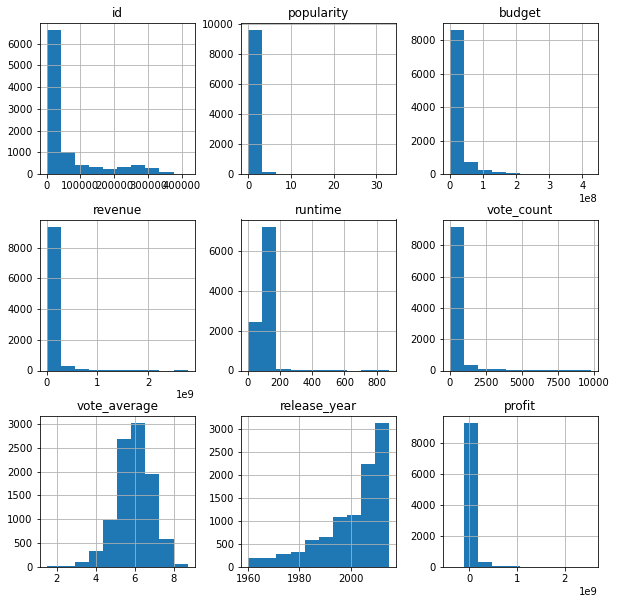

In [31]:
# overview of the data set
df.hist(figsize=(10,10))



Here we find the Average runtime of the movies

In [34]:

# defining a function to find average of a column
def avg_fun(column):
    return df[column].mean()

In [35]:
#calling above function
avg_fun('runtime')

103.06373603852853

So the average runtime a movie is 109 minutes. Lets analyse it in a visual form i.e. by graphical approach.

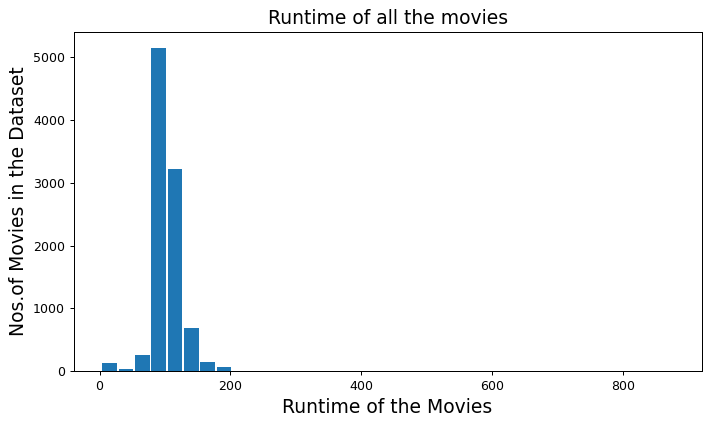

In [37]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 90)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

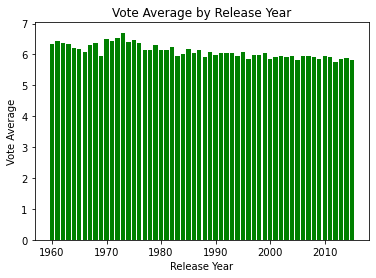

In [18]:
yearly_df = df.groupby('release_year').mean()
plt.bar(yearly_df.index,yearly_df['vote_average'], color = 'green')
plt.title('Vote Average by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.show()

In this bar chart, there seems to be a slight downward slope in average vote over time. Though there isn't necessarily a clear trend, it is safe to say that the most highly voted movies on TMDb were released between [  1960 and 1980 ]

### Let's show the Top Top 5 Directors of 2015

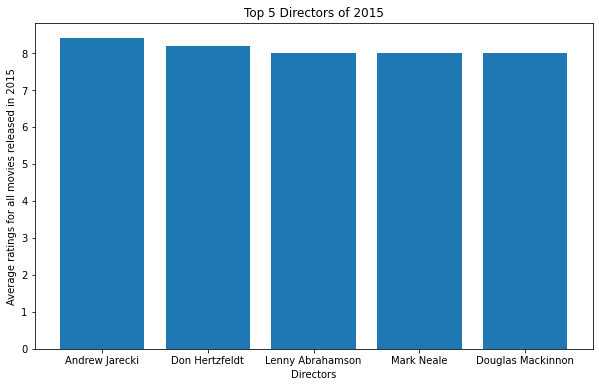

In [19]:
df_dir=df[df['release_year'] == 2015]
director_data = df_dir.groupby('director').mean().vote_average
sort_dir = director_data.sort_values(ascending=False)
plt.subplots(figsize=(10,6))
plt.bar(sort_dir.index[:5],sort_dir[:5])
plt.title('Top 5 Directors of 2015')
plt.xlabel('Directors')
plt.ylabel('Average ratings for all movies released in 2015');

## Whats the Top 10 Movie Has The Highest Profit?

In [20]:
df['profit'] = df['revenue']-df['budget']
df['profit'] = df['profit'].apply(np.int64)
df['budget'] = df['budget'].apply(np.int64)
df['revenue'] = df['revenue'].apply(np.int64)

In [21]:
def top_10(col_name,size=10):
    #find the all times top 10 for a fiven column
    #sort the given column and select the top 10
    df_sorted = pd.DataFrame(df[col_name].sort_values(ascending=False))[:size]
    df_sorted['original_title'] = df['original_title']
    plt.figure(figsize=(12,6))
    #Calculate the avarage
    avg = np.mean(df[col_name])   
    sns.barplot(x=col_name, y='original_title', data=df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + col_name.capitalize())
    plt.legend()

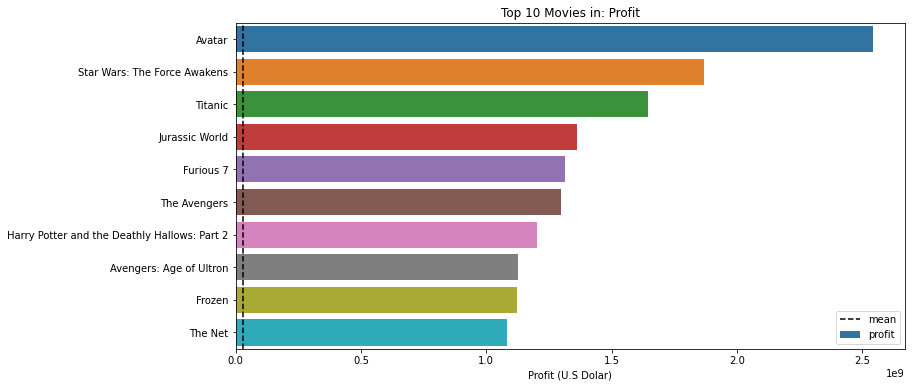

In [22]:
top_10('profit')

### Conclusions
There are many analyzes that we deduced from our data analysis, then I drew some graphs in this project, and I was also able to put questions that clarified the difference between each film and used this as a variable indicating the preference between films.



Since my analysis only shows the correlation between data type, it does not definitively conclude whether any trait can predict a movie's average rating. This will require a deeper statistical analysis that was not performed in this project.

### Q2

in 2015 Andrew jarecki have the highest rating (by avg)

### Q3 

The AVATAR movie that will top the revenues from our analysis of the top 10 most profitable films

limitations :


I didn't need the unrelated fields in the data but directors' names and ratings for their films. So, I got rid of the other fields.


the null values. Therefore, we first had to drop these entries